### Fun with King Tut CAT scan

#### Objective

Apart from a scaling factor (due to the different frequencies of the signals used) the remote sensing used to study the human body is very similar to the remote sensing used to study the subsurface. A major difference is that radiologist and doctors looking at an x-ray, ultrasound, or CAT scan image know what to look for in the image, as both bones and tissues, and anomalies, have certain known characteristics, whereas the subsurface is always to an extent unknown.

In this short notebook I am going to (apart from having some fun) use a CAT scan of King Tut's skull to show what the effect on the image as we progressively decimate the image and then upsample it back to the original size (equivalent to creating a grid of same size through interpolation). I will also show the effect on the result of edge detection.

With this I want to simulate the progressive reduction in imaging quality that happens when going from high density 3D seismic acquisition to medium density 3D seismic to high quality, but sparse 2D seismic lines.

#### Import libraries

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage import io, feature, color, exposure
from skimage.filters import sobel
from ipythonblocks import BlockGrid
%matplotlib inline

#### Import image - cat scan of King Tut skull (Supreme Council of Antiquities)
From http://guardians.net/hawass/press_release_tutankhamun_ct_scan_results.htm

Read more at http://www.two-views.com/celebrity/king-tut-xray.html#sthash.YuCwv0p2.dpbs


#### This is the ground truth

(400, 400)


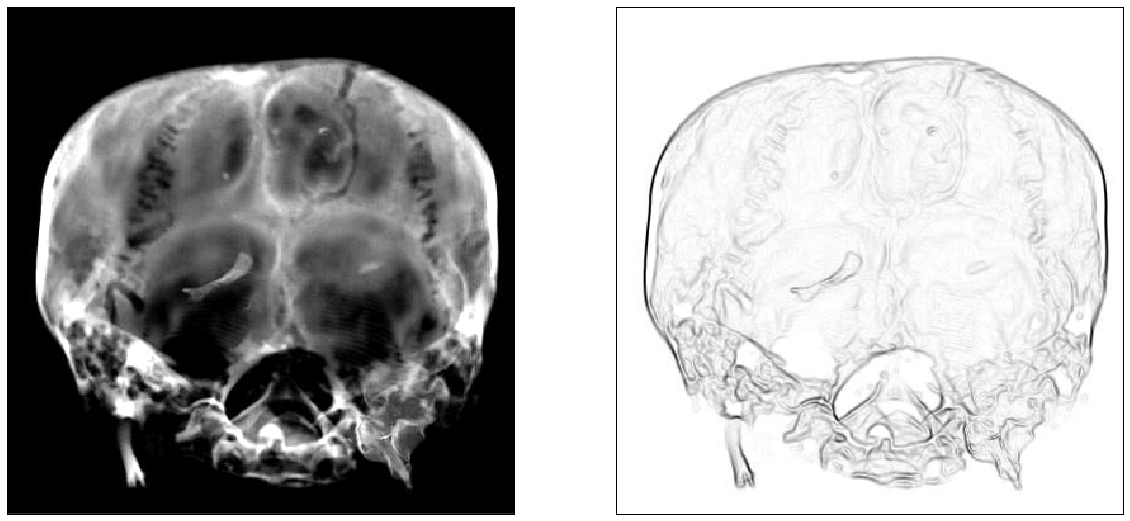

In [2]:
tut=io.imread('http://www.two-views.com/images/Tut%20bone%20frag.jpg') 

tut=color.rgb2gray(io.imread('Tut.jpg'))  
print tut.shape

# contrast stretching
p2, p98 = np.percentile(tut, (2, 98))
st_tut = exposure.rescale_intensity(tut, in_range=(p2, p98))

# edge detection
edges = sobel(st_tut)

fig = plt.figure(figsize=(20,20))

ax3 = fig.add_subplot(1, 2, 1)
plt.imshow(st_tut, cmap='gray', interpolation = 'none')
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(1, 2, 2)
plt.imshow(edges, cmap='gray_r', interpolation = 'none')
ax4.set_xticks([])
ax4.set_yticks([])

plt.show()

fig.savefig('ground_Tut.png', dpi=200, bbox_inches='tight', pad_inches=0)

#### Decimate the input image by a factor of 4 - simulates relatively high density seismic acquisition

(100, 100)


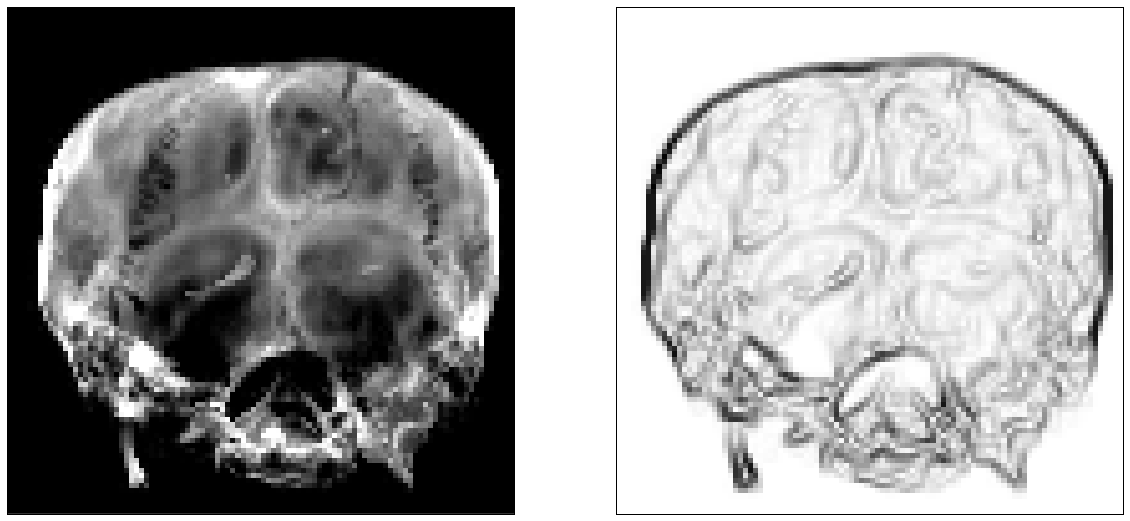

In [3]:
tut_d1 = st_tut[::4,::4]
print tut_d1.shape

edges_d1 = sobel(tut_d1)

fig = plt.figure(figsize=(20,20))

ax3 = fig.add_subplot(1, 2, 1)
plt.imshow(tut_d1, cmap='gray', interpolation = 'none')
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(1, 2, 2)
plt.imshow(edges_d1, cmap='gray_r', interpolation = 'none')
ax4.set_xticks([])
ax4.set_yticks([])

plt.show()

fig.savefig('highres_3D.png', dpi=200, bbox_inches='tight', pad_inches=0)

#### Additional decimation by a factor of 2 - simulates medium density seismic acquisition

(50, 50)
(100, 100)


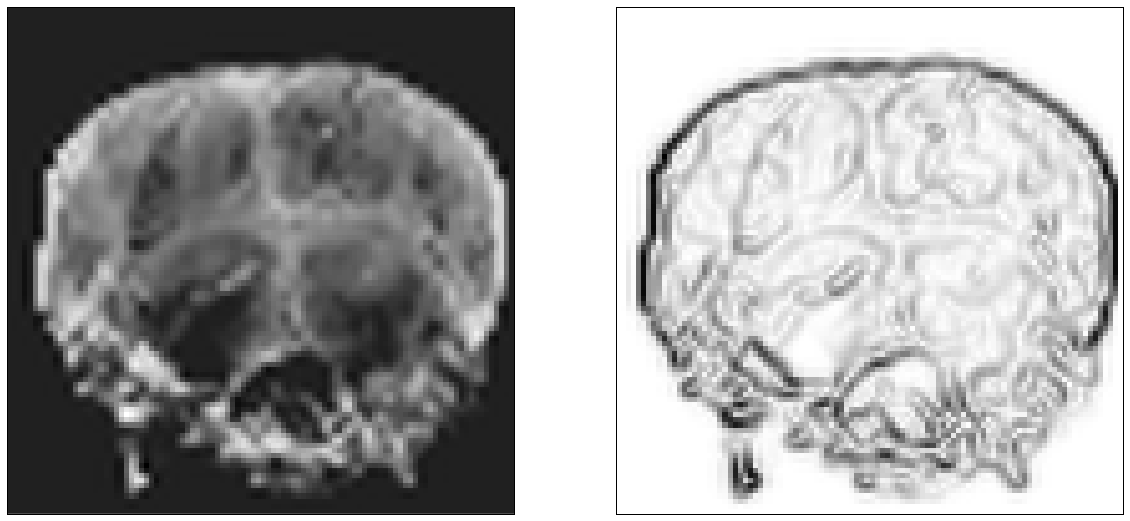

In [4]:
tut_d2 = tut_d1[::2,::2]
print tut_d2.shape

# interpolate back to original size (bilinear interpolation)
tut_d2 = sp.ndimage.interpolation.zoom(tut_d2, 2, order=2)
print tut_d2.shape

edges_d2 = sobel(tut_d2)

fig = plt.figure(figsize=(20,20))

ax3 = fig.add_subplot(1, 2, 1)
plt.imshow(tut_d2, cmap='gray', interpolation = 'none')
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(1, 2, 2)
plt.imshow(edges_d2, cmap='gray_r', interpolation = 'none')
ax4.set_xticks([])
ax4.set_yticks([])

plt.show()

fig.savefig('midres_3D.png', dpi=200, bbox_inches='tight', pad_inches=0)

#### Decimate the input image by a factor of 25 in one direction, just a factor of 2 in the other - simulates 2D seismic

In [5]:
# creating 3D canvas
twoD = np.zeros((400,400))
print twoD.shape
print twoD[:5,:5]

(400, 400)
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [6]:
# creating 2D lines and upsample with 1D interpolation
tut_d3 = st_tut[::25,::2]
tut_d31 = sp.ndimage.interpolation.zoom(tut_d3, (1,2), order=2) 
print tut_d31.shape

(16, 400)


(400, 400)


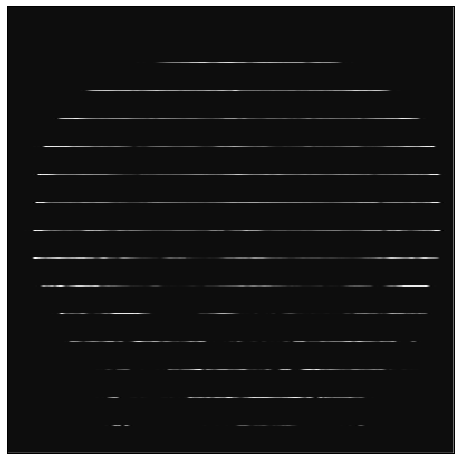

In [7]:
# pasting 2D lines on 3D canvas
twoD[::25,:] = tut_d31[:,:]

print twoD.shape

fig = plt.figure(figsize=(8,8))

ax3 = fig.add_subplot(1, 1, 1)
plt.imshow(twoD, cmap='gray', interpolation = 'none')
ax3.set_xticks([])
ax3.set_yticks([])

fig.savefig('2D.png', dpi=200, bbox_inches='tight', pad_inches=0)

(400, 400)


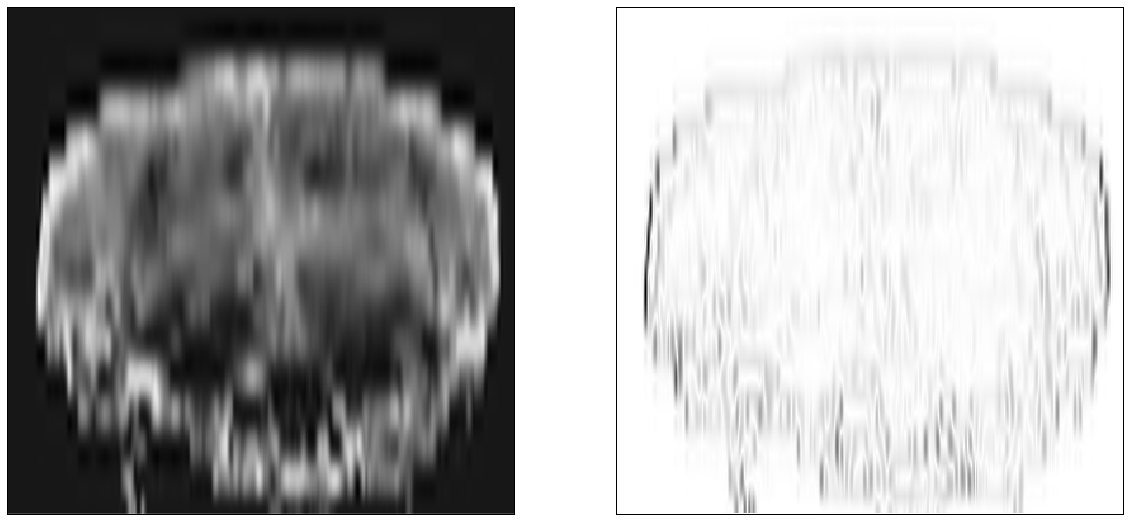

In [8]:
# interpolate to 3D size by 1D interpolation in the other direction
tut_d4 = sp.ndimage.interpolation.zoom(tut_d31,(25,1), order=2) 
print tut_d4.shape

edges_d4 = sobel(tut_d4)


fig = plt.figure(figsize=(20,20))

ax3 = fig.add_subplot(1, 2, 1)
plt.imshow(tut_d4, cmap='gray', interpolation = 'none')
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(1, 2, 2)
plt.imshow(edges_d4, cmap='gray_r', interpolation = 'none')
ax4.set_xticks([])
ax4.set_yticks([])

plt.show()

fig.savefig('interpolated_2D.png', dpi=200, bbox_inches='tight', pad_inches=0)

#### Quantify the deterioration of image with iterative decimation

How does the image deteriorate as we iteratively decimate it and upsample it?
What about the sobel edge?

To answer those querstions I devised this experiment:

1 - take the input image and within a loop decimate by a factor of n and a factor of n/2 at each iteration,obtaining two new images A and B
- upsample to the original size both A and B using sp.ndimage.interpolation.zoom, with zoom factors of n and n/2
- calculate the mse of the element by element difference between upsampled A and B at each iteration 
- graph the variation in mse from iteration to iteration

In [9]:
# padding the image to the next power of 2
pd = (512-st_tut.shape[1])/2 
st_tut_pd = np.pad(st_tut, pd, 'edge')
print st_tut_pd.shape

(512, 512)


In [10]:
# creating the indices for iterative decimation
idx = np.array([2**x for x in range(9)][1:])
print idx

[  2   4   8  16  32  64 128 256]


In [11]:
# iteratively decimate, upsample, calculate mse
mse_tut = []
mse_tut_edges = []

for n in (idx):
        temp1 = st_tut_pd[::n,::n]
        temp2 = st_tut_pd[::n/2,::n/2]
        tempz1 = sp.ndimage.interpolation.zoom(temp1, n, order=2)
        tempz2 = sp.ndimage.interpolation.zoom(temp2, n/2, order=2)
        edgesz1 = sobel(tempz1)
        edgesz2 = sobel(tempz2)
        mse_temp = ((tempz2 - tempz1) ** 2).mean(axis=None)
        mse_tut.append(mse_temp)
        mse_tempz = ((edgesz1 - edgesz2) ** 2).mean(axis=None)
        mse_tut_edges.append(mse_tempz)


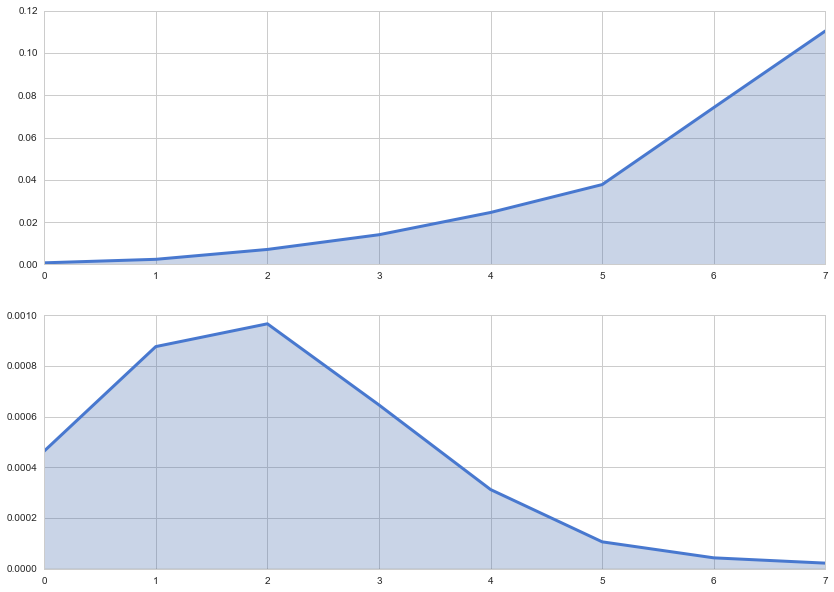

In [13]:
# plot mse
import seaborn as sns
sns.set_style("whitegrid")

blue, = sns.color_palette("muted", 1)

fig = plt.figure(figsize=(14,10))

x = np.arange(len(mse_tut))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x, mse_tut, color=blue, lw=3)
ax1.fill_between(x, 0, mse_tut, alpha=.3)


ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x, mse_tut_edges, color=blue, lw=3)
ax2.fill_between(x, 0, mse_tut_edges, alpha=.3)